<a href="https://colab.research.google.com/github/ancestor9/2025_Winter_Deep-Learning-with-TensorFlow/blob/main/14_4_tensorflow_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


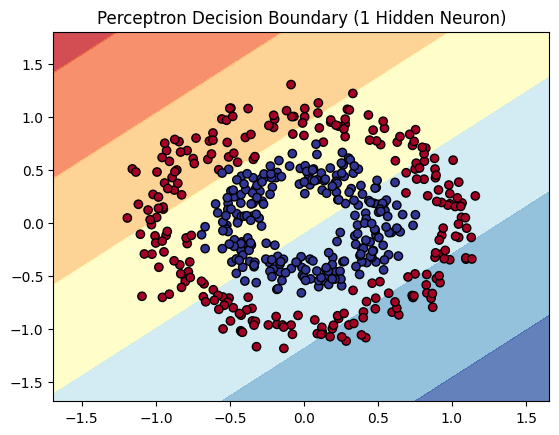

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# 1. 데이터 생성 (이미지의 Circle 데이터셋 재현)
# n_samples: 데이터 개수, noise: 노이즈 정도, factor: 안쪽 원과 바깥쪽 원의 거리 비율
X, y = make_circles(n_samples=500, noise=0.1, factor=0.5, random_state=42)

# 2. 퍼셉트론(신경망) 모델 생성
# 이미지 설정: Hidden Layer 1개, Neuron 1개, Activation Tanh
model = Sequential([
    Dense(1, input_dim=2, activation='tanh', name='hidden_layer'), # 은닉층: 1개 뉴런
    Dense(1, activation='sigmoid', name='output_layer')            # 출력층: 이진 분류
])

# 3. 모델 컴파일 (학습률 0.03, Optimizer SGD)
optimizer = SGD(learning_rate=0.03)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 4. 모델 학습 (이미지 상의 Epoch 273 근사치)
history = model.fit(X, y, epochs=273, batch_size=10, verbose=0)

# 5. 시각화 (결정 경계 그리기)
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
    plt.title("Perceptron Decision Boundary (1 Hidden Neuron)")
    plt.show()

plot_decision_boundary(X, y, model)

In [ ]:
X[:10]

array([[-0.46918557,  0.24791499],
       [-0.06748724,  1.00676912],
       [-0.44306526,  0.02738322],
       [-0.61172505, -0.6314071 ],
       [-0.78901285,  0.68451888],
       [-0.42136979, -0.25688616],
       [-0.45473954,  0.08850207],
       [-0.94954151,  0.13119395],
       [-0.20468777,  0.903653  ],
       [ 0.10000474, -0.60226649]])

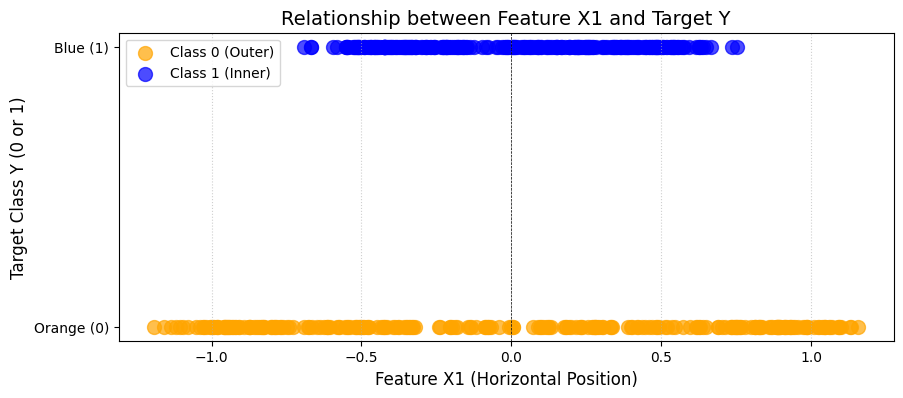

In [ ]:
# X1 값 추출 (배열의 첫 번째 열)
x1 = X[:, 0]

# 2. 시각화
plt.figure(figsize=(10, 4))

# 클래스별로 색상을 나누어 산점도 그리기
plt.scatter(x1[y==0], y[y==0], color='orange', s=100, label='Class 0 (Outer)', alpha=0.7)
plt.scatter(x1[y==1], y[y==1], color='blue', s=100, label='Class 1 (Inner)', alpha=0.7)

# 그래프 꾸미기
plt.axvline(0, color='black', linestyle='--', linewidth=0.5) # 중앙선
plt.title("Relationship between Feature X1 and Target Y", fontsize=14)
plt.xlabel("Feature X1 (Horizontal Position)", fontsize=12)
plt.ylabel("Target Class Y (0 or 1)", fontsize=12)
plt.yticks([0, 1], ['Orange (0)', 'Blue (1)'])
plt.grid(axis='x', linestyle=':', alpha=0.6)
plt.legend()
plt.show()

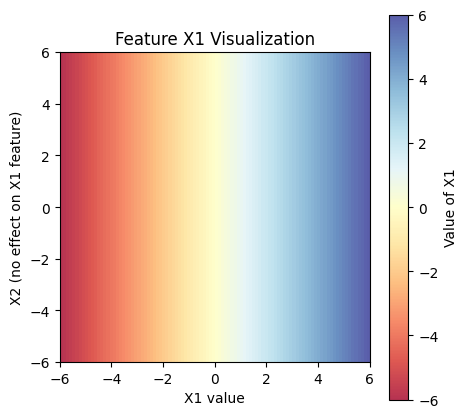

In [ ]:
# 1. 평면을 격자 형태로 나누기 (가로 -6 ~ 6, 세로 -6 ~ 6 범위)
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X1, X2 = np.meshgrid(x, y)

# 2. X1 Feature 값 정의
# X1 특성은 평면의 각 지점에서 단순히 '가로 좌표값' 그 자체입니다.
feature_x1 = X1

# 3. 시각화 (Playground의 색감 재현)
plt.figure(figsize=(5, 5))
# RdYlBu 매핑을 사용하여 음수는 주황(Red계열), 양수는 파랑(Blue계열)으로 표시
plt.imshow(feature_x1, extent=[-6, 6, -6, 6], origin='lower', cmap='RdYlBu', alpha=0.8)

plt.title("Feature X1 Visualization", fontsize=12)
plt.xlabel("X1 value")
plt.ylabel("X2 (no effect on X1 feature)")
plt.colorbar(label="Value of X1")
plt.show()

In [ ]:
X1[:2]

array([[-6.        , -5.87878788, -5.75757576, -5.63636364, -5.51515152,
        -5.39393939, -5.27272727, -5.15151515, -5.03030303, -4.90909091,
        -4.78787879, -4.66666667, -4.54545455, -4.42424242, -4.3030303 ,
        -4.18181818, -4.06060606, -3.93939394, -3.81818182, -3.6969697 ,
        -3.57575758, -3.45454545, -3.33333333, -3.21212121, -3.09090909,
        -2.96969697, -2.84848485, -2.72727273, -2.60606061, -2.48484848,
        -2.36363636, -2.24242424, -2.12121212, -2.        , -1.87878788,
        -1.75757576, -1.63636364, -1.51515152, -1.39393939, -1.27272727,
        -1.15151515, -1.03030303, -0.90909091, -0.78787879, -0.66666667,
        -0.54545455, -0.42424242, -0.3030303 , -0.18181818, -0.06060606,
         0.06060606,  0.18181818,  0.3030303 ,  0.42424242,  0.54545455,
         0.66666667,  0.78787879,  0.90909091,  1.03030303,  1.15151515,
         1.27272727,  1.39393939,  1.51515152,  1.63636364,  1.75757576,
         1.87878788,  2.        ,  2.12121212,  2.2

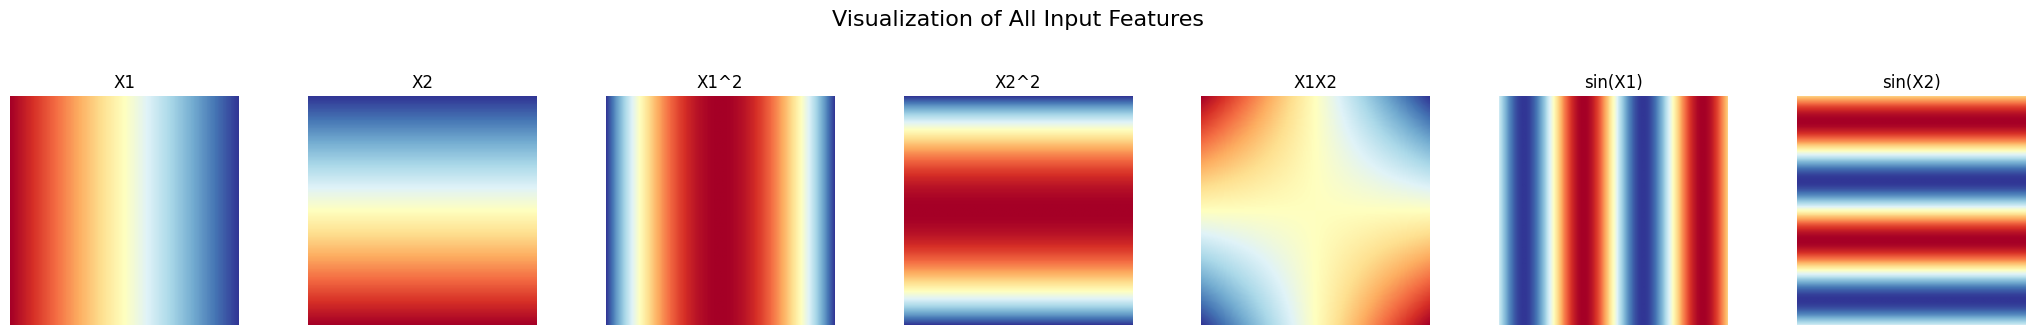

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 평면 격자 생성 (-6 ~ 6 범위)
x = np.linspace(-6, 6, 200)
y = np.linspace(-6, 6, 200)
X1, X2 = np.meshgrid(x, y)

# 2. 각 Feature 계산 (이미지에 표시된 순서대로)
features = {
    "X1": X1,
    "X2": X2,
    "X1^2": X1**2,
    "X2^2": X2**2,
    "X1X2": X1 * X2,
    "sin(X1)": np.sin(X1),
    "sin(X2)": np.sin(X2)
}

# 3. 한 행에 시각화 (1 row, 7 columns)
fig, axes = plt.subplots(1, 7, figsize=(21, 3))
fig.suptitle("Visualization of All Input Features", fontsize=16, y=1.1)

for ax, (name, data) in zip(axes, features.items()):
    # RdYlBu 매핑: 음수(주황/빨강), 0(흰색/노랑), 양수(파랑)
    im = ax.imshow(data, extent=[-6, 6, -6, 6], origin='lower', cmap='RdYlBu', aspect='equal')
    ax.set_title(name, fontsize=12)
    ax.axis('off') # 축 숨기기

plt.tight_layout()
plt.show()

In [ ]:
X1.shape

(200, 200)

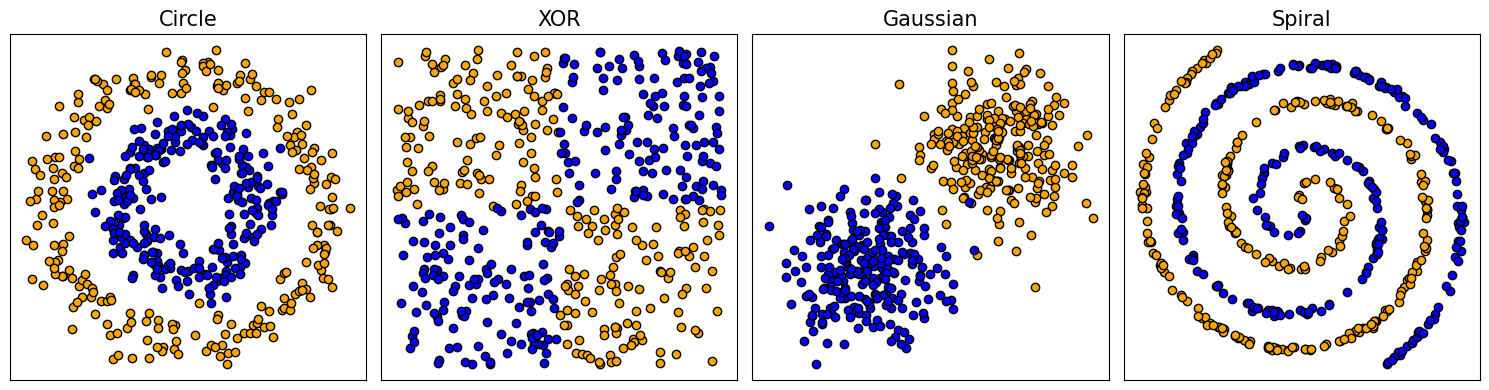

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_blobs

# 1. 데이터 생성 함수 정의
def generate_datasets(n_samples=500):
    # (1) Circle 데이터
    X_circle, y_circle = make_circles(n_samples=n_samples, factor=0.5, noise=0.1)

    # (2) XOR 데이터
    X_xor = np.random.uniform(-4, 4, (n_samples, 2))
    y_xor = np.zeros(n_samples)
    y_xor[(X_xor[:, 0] * X_xor[:, 1] > 0)] = 1

    # (3) Gaussian 데이터
    X_gauss, y_gauss = make_blobs(n_samples=n_samples, centers=[[2, 2], [-2, -2]], cluster_std=1.2)

    # (4) Spiral 데이터
    def spiral(n_points, noise=0.5):
        n = np.sqrt(np.random.rand(n_points, 1)) * 780 * (2 * np.pi) / 360
        d1x = -np.cos(n) * n + np.random.rand(n_points, 1) * noise
        d1y = np.sin(n) * n + np.random.rand(n_points, 1) * noise
        return np.vstack((np.hstack((d1x, d1y)), np.hstack((-d1x, -d1y)))), \
               np.hstack((np.zeros(n_points), np.ones(n_points)))
    X_spiral, y_spiral = spiral(n_samples // 2)

    return [(X_circle, y_circle, "Circle"), (X_xor, y_xor, "XOR"),
            (X_gauss, y_gauss, "Gaussian"), (X_spiral, y_spiral, "Spiral")]

# 2. 시각화 실행
datasets = generate_datasets()
fig, axes = plt.subplots(1, 4, figsize=(15, 4))

for ax, (X, y, title) in zip(axes, datasets):
    ax.scatter(X[y==0, 0], X[y==0, 1], color='orange', edgecolors='k', label='Class 0')
    ax.scatter(X[y==1, 0], X[y==1, 1], color='blue', edgecolors='k', label='Class 1')
    ax.set_title(title, fontsize=15)
    ax.set_xticks([]); ax.set_yticks([]) # 축 숨기기 (아이콘 느낌)

plt.tight_layout()
plt.show()

In [ ]:
# 1. 데이터 생성 (Circle 데이터)
X_raw, y = make_circles(n_samples=500, noise=0.1, factor=0.5, random_state=42)


# 2. 입력 변수 구성: X1, X2에 X1^2, X2^2를 추가하여 4열로 만듦
X1 = X_raw[:, 0:1]
X2 = X_raw[:, 1:2]
X1_sq = X1**2
X2_sq = X2**2

# 최종 입력 데이터 X (형태: 500행 3열)
X = np.concatenate([X1, X2, X1_sq, X2_sq], axis=1)

In [ ]:
X_raw[:5]

array([[-0.46918557,  0.24791499],
       [-0.06748724,  1.00676912],
       [-0.44306526,  0.02738322],
       [-0.61172505, -0.6314071 ],
       [-0.78901285,  0.68451888]])

In [ ]:
X1 = X_raw[:, 0:1]
print(X1.shape)
X1[:5]

(500, 1)


array([[-0.46918557],
       [-0.06748724],
       [-0.44306526],
       [-0.61172505],
       [-0.78901285]])

In [ ]:
X.shape

(500, 4)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


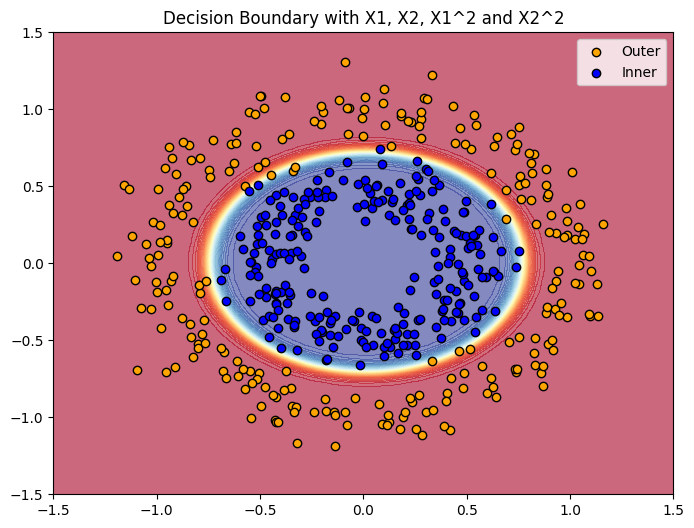

In [ ]:
# 3. 모델 구축 (입력 변수가 4개이므로 input_dim=4)
model = Sequential([
    # 은닉층: 뉴런 1개, Tanh 활성화 함수
    Dense(1, input_dim=4, activation='tanh'),
    # 출력층: 이진 분류를 위한 Sigmoid
    Dense(1, activation='sigmoid')
])

# 4. 모델 컴파일 (학습률 0.03 설정)
optimizer = SGD(learning_rate=0.03)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 5. 모델 학습
model.fit(X, y, epochs=300, batch_size=10, verbose=0)

# 6. 시각화 (결정 경계 확인)
def plot_decision_boundary_3vars(X_raw, y, model):
    x_range = np.linspace(-1.5, 1.5, 100)
    y_range = np.linspace(-1.5, 1.5, 100)
    xx, yy = np.meshgrid(x_range, y_range)

    # 예측을 위한 그리드 데이터에도 동일하게 X1^2, X2^2를 추가해야 함
    grid_x1 = xx.ravel().reshape(-1, 1)
    grid_x2 = yy.ravel().reshape(-1, 1)
    grid_x1_sq = grid_x1**2
    grid_x2_sq = grid_x2**2 # Missing in original code
    grid_input = np.concatenate([grid_x1, grid_x2, grid_x1_sq, grid_x2_sq], axis=1) # Fixed concatenation

    Z = model.predict(grid_input).reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, levels=50, cmap='RdYlBu', alpha=0.6)
    plt.scatter(X_raw[y==0, 0], X_raw[y==0, 1], c='orange', edgecolors='k', label='Outer')
    plt.scatter(X_raw[y==1, 0], X_raw[y==1, 1], c='blue', edgecolors='k', label='Inner')
    plt.title("Decision Boundary with X1, X2, X1^2 and X2^2")
    plt.legend()
    plt.show()

plot_decision_boundary_3vars(X_raw, y, model)